### Figure 1 of *Ritter et al. (2022)*

This Jupyter Notebook allows to reproduce Fig. 1 of our paper:

> ***Ritter, J. R. R., Fröhlich, Y., Sanz Alonso, Y., Grund, M. (2022)***, Short-scale laterally varying SK(K)S shear wave splitting at BFO, Germany – implications for the determination of anisotropic structures, *Journal of Seismology*, 26, 1137-1156, https://doi.org/10.1007/s10950-022-10112-w, https://doi.org/10.1007/s10950-023-10136-w.

**See also:**
* [Fig. S4 left](https://github.com/yvonnefroehlich/gmt-pygmt-plotting/blob/main/001_paper_RFSG_2022/Figure_S4/RFSG_FigS4_left_swsm.ipynb): Piercing points in the lowermost mantle related to SWSMs at BFO
* [Fig. S4 right](https://github.com/yvonnefroehlich/gmt-pygmt-plotting/blob/main/001_paper_RFSG_2022/Figure_S4/RFSG_FigS4_right_pairs.ipynb): SKS-SKKS pairs in the lowermost mantle related to SWSMs at BFO

**Requirements history:**

* 2021-07-31 (original version): PyGMT [0.3.0](https://www.pygmt.org/v0.3.0/index.html) & GMT [6.1.1](https://docs.generic-mapping-tools.org/6.1/)
* 2022-08-08: PyGMT [0.6.1](https://www.pygmt.org/v0.6.1/index.html) & GMT >= [6.3.0](https://docs.generic-mapping-tools.org/6.3/)
* 2023-03-24 (last modified): PyGMT [0.8.0](https://www.pygmt.org/v0.8.0/index.html) & GMT >= [6.3.0](https://docs.generic-mapping-tools.org/6.3/)

**Main author:**
* Michael Grund ([@michaelgrund](https://github.com/michaelgrund))

In [12]:
import pygmt 

# define parameters for plotting
pygmt.config(MAP_GRID_PEN_PRIMARY = "0.3p,dimgrey",
             MAP_ANNOT_OBLIQUE = "30",
             MAP_ANNOT_OFFSET_PRIMARY = "5p",
             MAP_ANNOT_OFFSET_SECONDARY = "5p", 
             FONT_ANNOT_PRIMARY = "10p,Helvetica", 
             FONT_LABEL = "10p",
             MAP_FRAME_WIDTH = "2p",
             MAP_FRAME_PEN = "1.5p",
             MAP_TICK_LENGTH_PRIMARY = "5p",
             MAP_LABEL_OFFSET = "5.5p")

To reduce the notebook file size, the resolution of the preview figures is set to ``dpi = 100`` in the following. If you want to get the final figure in high quality simply set ``dpi = 300`` or ``dpi = 600``.

In [2]:
dpi = 100

Lay out the map. The used colormap *europe_3.cpt* is available from [here](http://soliton.vm.bytemark.co.uk/pub/cpt-city/esri/hypsometry/eu/tn/europe_3.png.index.html).

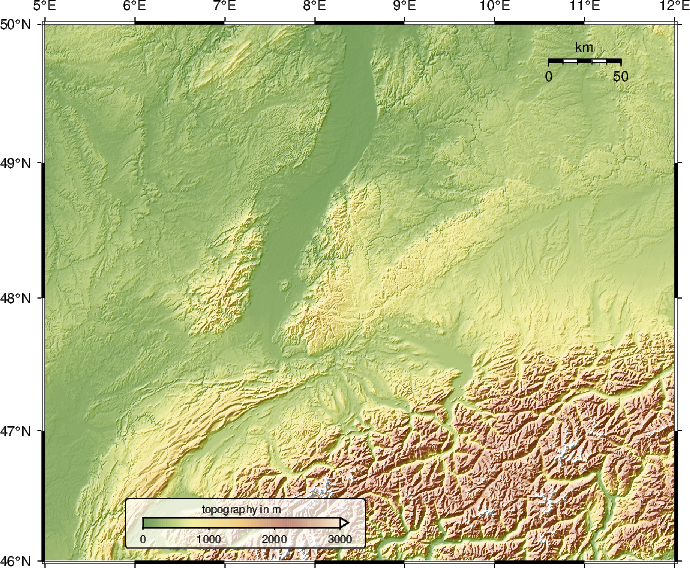

In [3]:
fig = pygmt.Figure()

# create colormap based on europe_3.cpt
pygmt.makecpt(cmap = "europe_3.cpt", series = [0, 3000, 10])
region = [5, 12, 46, 50]

fig.grdimage(grid = "@earth_relief_15s",
            shading = True,
            projection = "M16",
            region = region,
            frame = ["a1","WNse"])

fig.basemap(map_scale = "f11/49.75/56/50+lkm+jt")

# add colorbar 
with pygmt.config(FONT_ANNOT_PRIMARY = "8p,Helvetica",
                  FONT_LABEL = "8p", 
                  MAP_ANNOT_OFFSET = "0.05i",  
                  MAP_TICK_LENGTH_PRIMARY = "0.05",
                  MAP_LABEL_OFFSET = "3.5p",
                  MAP_FRAME_PEN = "0.8p"):

    fig.colorbar(position = "x2.5c/0.85c+w5c/0.25c/BL+h+ef0.2c+ml",
                frame = 'x1000+l"topography in m"',
                box = "+r2p+gwhite@30+p0.5p")

fig.show(dpi = dpi)

Add station location and cities.

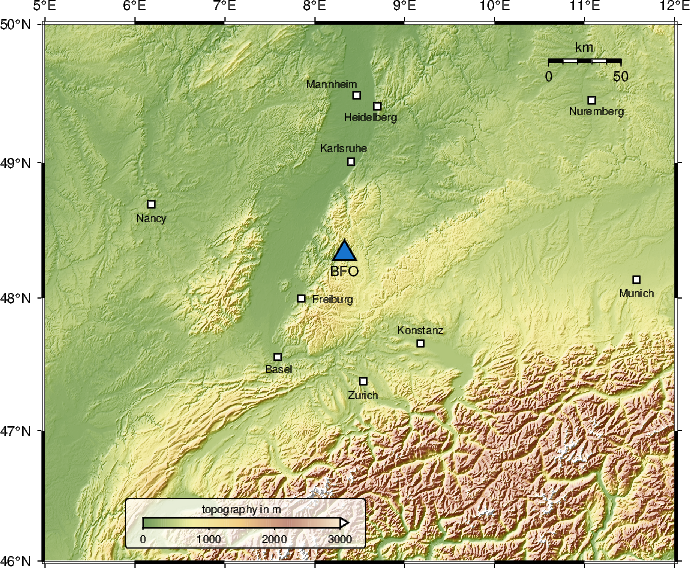

In [4]:
# BFO location 
fig.plot(x = 8.331, y = 48.332, style = "t19p", fill = "24/116/205", pen = "0.9p")
fig.text(x = 8.331, y = 48.2, text = "BFO", font = "10p")    
    
# plot important town locations as squares
style = "s0.25c"
color = "white"
pen = "0.6p,black"

lons = [8.4034195, 7.8494005, 8.4673098, 11.077298, 7.5878261, 11.5753822, 8.694724, 6.1834097, 8.5410422, 9.1750718]
lats = [49.0068705, 47.9960901, 49.4892913, 49.453872, 47.5581077, 48.1371079, 49.4093582, 48.6937223, 47.3744489, 47.659216]

for lon, lat in zip(lons, lats):
    fig.plot(x = lon, y = lat, style = style, fill = color, pen = pen)

# add annotations     
lons = [8.32, 8.2, 8.19, 11.1296, 7.6, 11.576006, 8.62, 6.184417, 8.539183, 9.173238]
lats = [49.11, 47.99, 49.57, 49.3741, 47.4667, 48.037079, 49.33, 48.592054, 47.268650, 47.7579496]
cities = ["Karlsruhe", "Freiburg", "Mannheim", "Nuremberg", "Basel", "Munich", "Heidelberg", "Nancy", 
          "Zurich", "Konstanz"]

for lon, lat, city in zip(lons, lats, cities):
    fig.text(x = lon, y = lat, text = city, font = "8p")
    
fig.show(dpi = dpi)

Add annotations of geological/tectonic features.

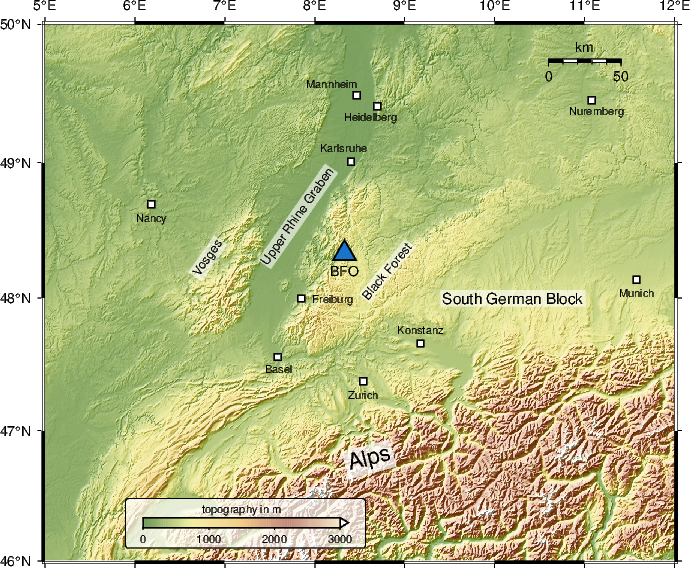

In [5]:
# background color of text boxes
color = "white@40"

fig.text(x = 8.6, y = 46.8, text = "Alps", font = "16p+a15", fill = "white@25")
fig.text(x = 8.8, y = 48.2, text = "Black Forest", font = "9p+a50", fill = color)
fig.text(x = 6.8, y = 48.3, text = "Vosges", font = "9p+a55", fill = color)
fig.text(x = 7.8, y = 48.61, text = "Upper Rhine Graben", font = "9p+a55", fill = color)
fig.text(x = 10.2, y = 48, text = "South German Block", font = "11p", fill = color)

fig.show(dpi = dpi)

Add *SKS*/*SKKS*/*PKS* piercing points in 410 km depth and corresponding legend.

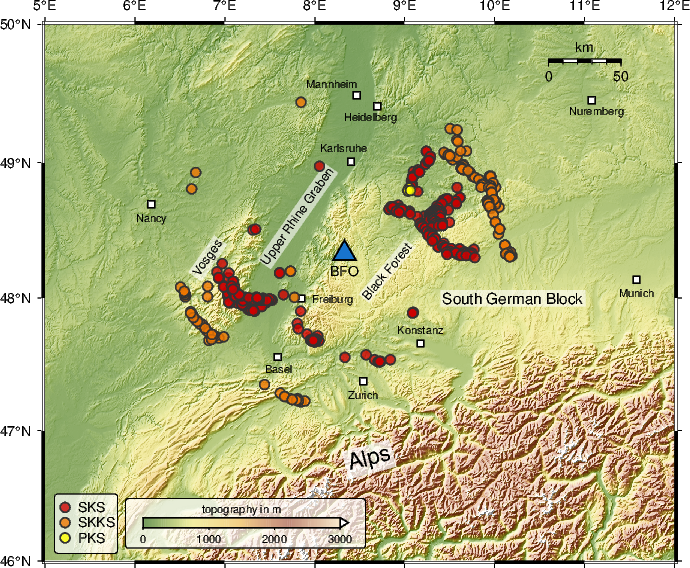

In [6]:
style = "c0.25c"
pen = "0.8p,gray20"

# plot single event pierce points
fig.plot(data = "BFO_SEA_pp410km_SKS_sp_hd0km.txt", 
         incols = [2, 3], 
         style = style, 
         fill = "205/0/0@20", 
         pen = pen,
         label= f"SKS+S0.25c")

fig.plot(data = "BFO_SEA_pp410km_SKKS_sp_hd0km.txt", 
         incols = [2, 3], 
         style = style,
         fill = "238/118/0@20", 
         pen = pen,
         label= f"SKKS+S0.25c")

# plot pierce points of events used in the multi-event analysis (SIMW and WS)
fig.plot(data = "BFO_MEAred_pp410km_SKS_sp_hd0km.txt", 
         incols = [2, 3], 
         style = style, 
         fill = "205/0/0@20", 
         pen = pen)

fig.plot(data = "BFO_MEAred_pp410km_SKKS_sp_hd0km.txt", 
         incols = [2, 3], 
         style = style, 
         fill = "238/118/0@20", 
         pen = pen)

fig.plot(data = "BFO_MEAred_pp410km_PKS_sp_hd0km.txt", 
         incols = [2, 3], 
         style = style, 
         fill = "yellow@20", 
         pen = pen, label= f"PKS+S0.25c")

fig.legend(position = "x0.25c/0.2c/1.6c/1.5c/BL", box = "+r2p+gwhite@30+p0.5p") 

fig.show(dpi = dpi)         

Add content for Kaiserstuhl volcanic complex.

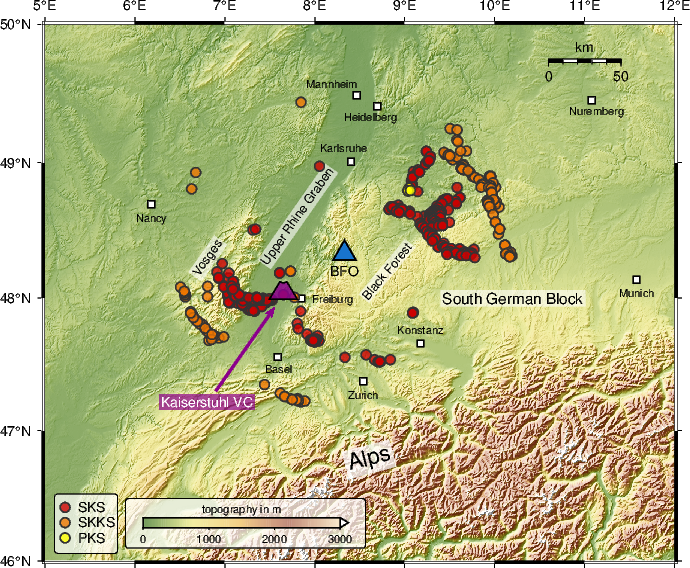

In [7]:
# plot volcano symbol at Kaiserstuhl
fig.plot(x = 7.690556, y = 48.120833, style = "kvolcano_sleeping/25p", fill = "magenta4@15", pen = "thin,black")

# add arrow and annotation
fig.plot(x = 6.9, y = 47.3, 
         direction = [[35], [2.6]], 
         style = "V0.25c+e+n0.03c+a40", 
         fill = "magenta4", 
         pen = "2p,magenta4")

fig.text(x = 6.8, y = 47.22, text = "Kaiserstuhl VC", 
         font = "10p,white", fill = "magenta4@30", 
         clearance = "0.025i/0.025i")

fig.show(dpi = dpi)

Create an inset map, setting the position to top left, the width to
2.8 cm, the height to 3.9 cm, and the x- and y-offsets to
0.1 cm, respectively (``"jTL+w2.8c/3.9c+o0.1c"``). Draw a rectangular box around the inset with a fill color
of ``"white"`` and a pen of ``"2p"``.

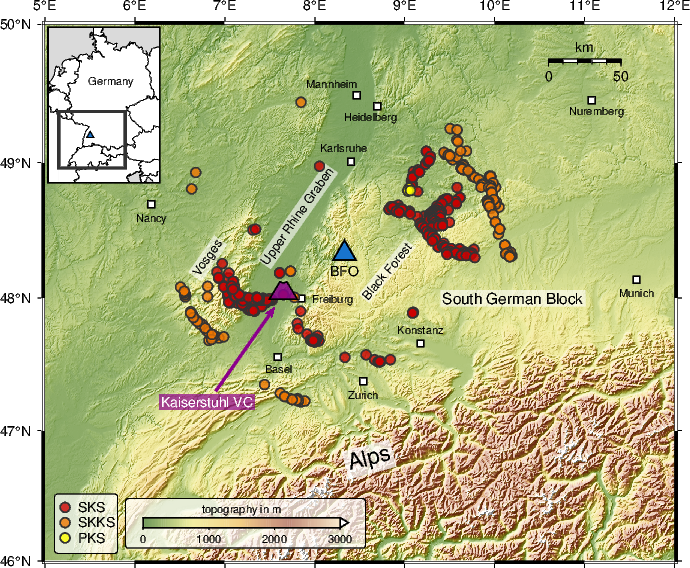

In [8]:
with fig.inset(position = "jTL+w2.8c/3.9c+o0.1c", box = "+gwhite+p2p"):
    fig.coast(
        region = [4, 15.5, 45, 55.3],
        projection = "M?",
        land = "white",
        water = "217.6/217.6/217.6",
        shorelines = "thinnest",
        borders = "1/0.25p,black",
        area_thresh = 10000
    )
        
    # Plot a rectangle ("r") in the inset map to show the area of the main figure.
    # "+s" means that the first two columns are the longitude and latitude of
    # the bottom left corner of the rectangle, and the last two columns the
    # longitude and latitude of the upper right corner (see PyGMT gallery example 
    # https://www.pygmt.org/dev/gallery/embellishments/inset_rectangle_region.html#sphx-glr-gallery-embellishments-inset-rectangle-region-py)
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data = rectangle, style = "r+s", pen = "2p,gray20", straight_line = True)
    
    # BFO location 
    fig.plot(x = 8.331, y = 48.332, style = "t6p", fill = "24/116/205", pen = "0.5p")
    
    # annotation 
    fig.text(x = 10.5, y = 52, text = "Germany", font = "8p")

    
fig.show(dpi = dpi)

Add equidistant map in lower right corner.

coast [WARNING]: Fill/clip continent option (-G) may not work for this projection.
coast [WARNING]: If the antipode (1/0) is in the ocean then chances are good it will work.
coast [WARNING]: Otherwise, avoid projection center coordinates that are exact multiples of 188.331 degrees.


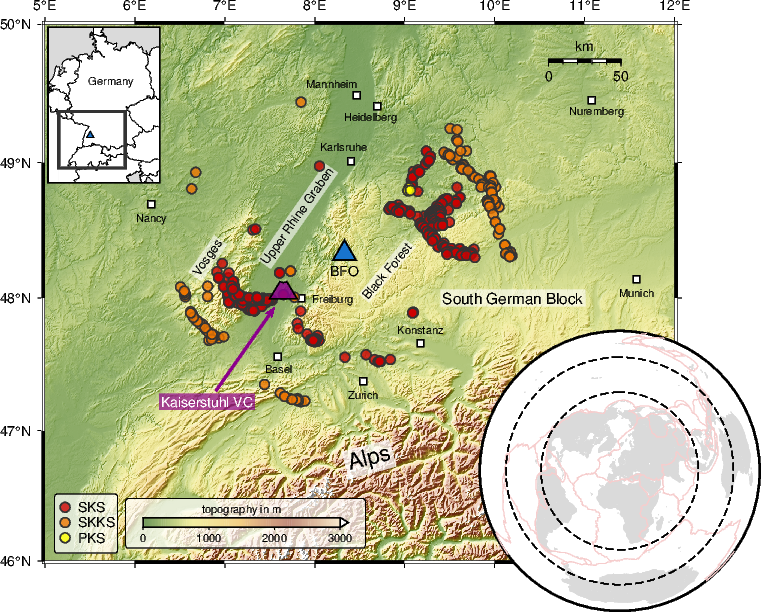

In [9]:
# first make a shift to the right and down
fig.shift_origin(xshift = "4.35i", yshift = "-0.5i")

# center of map (BFO location)
centerN = 48.332 # latitude in degrees
centerE = 8.331 # longitude in degrees

colfill = "217.6/217.6/217.6"
fig.coast(region = "g", projection = "E" + str(centerE) + "/" + str(centerN) + "/160/2.8i", 
          resolution = "c", land = colfill, shorelines = "1/0.1p," + colfill, lakes = colfill, frame = True)

# plot plate boundaries after Bird (2003)
plbfile = "pb2003_GMTready.txt"
plbcol = "245.76/204.8/204.8"
fig.plot(data = plbfile, pen = "0.5p," + plbcol)

# plot circles at 90 and 130 degrees distance from station, 
# use here twice the value since GMT expects the diameter
distlims = [90, 130]

for lims in distlims:
    fig.plot(x = centerE, 
             y = centerN, 
             style = "E-" + str(2 * lims) + "d", 
             pen = "0.7p,black,--")


fig.show(dpi = dpi)

Add content to equidistant map.

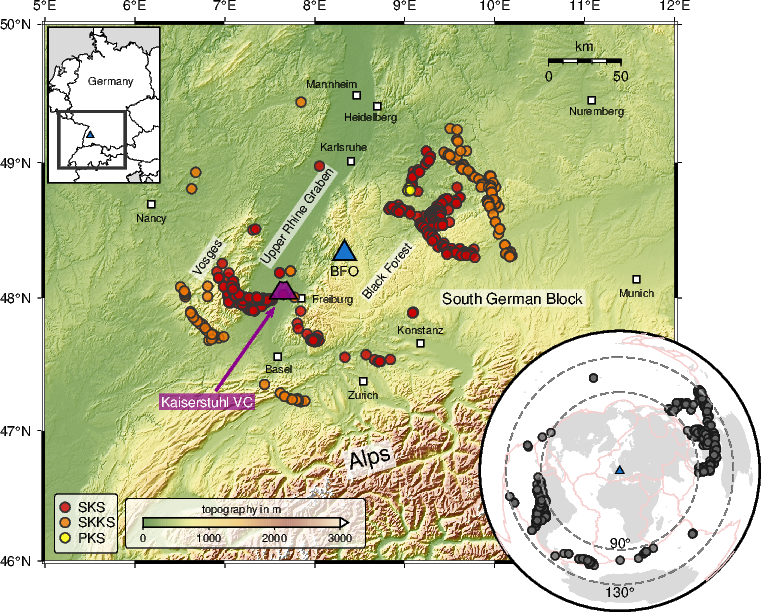

In [10]:
# marker at BFO 
fig.plot(x = centerE, y = centerN, style = "t0.25c", fill = "24/116/205", pen = "0.5p,black")

# plot event locations
style = "c0.2c"
color = "gray40@20"
pen = "0.8p,gray10"

fig.plot(data = "BFO_SEA_pp410km_SKS_sp_hd0km.txt", incols = [0, 1], 
         style = style, fill = color, pen = pen)

fig.plot(data = "BFO_SEA_pp410km_SKKS_sp_hd0km.txt", incols = [0, 1], 
         style = style, fill = color, pen = pen)

fig.plot(data = "BFO_MEAred_pp410km_SKS_sp_hd0km.txt", incols = [0, 1], 
         style = style, fill = color, pen = pen)

fig.plot(data = "BFO_MEAred_pp410km_SKKS_sp_hd0km.txt", incols = [0, 1], 
         style = style, fill = color, pen = pen)

fig.plot(data = "BFO_MEAred_pp410km_PKS_sp_hd0km.txt", incols = [0, 1], 
         style = style, fill = color, pen = pen)

# plot distance circles again on top in transparent white
for lims in distlims:
    fig.plot(x = centerE, 
             y = centerN, 
             style = "E-" + str(2 * lims) + "d", 
             pen = "0.7p,white,--", 
             transparency = "70")
    
# plot text on circles
fig.text(x = 9, 
         y = -33.5, 
         text = "90@.", 
         font = "10p")

fig.text(x = 9, 
         y = -90, 
         text = "130@.", 
         font = "10p")

fig.show(dpi = dpi)

In [11]:
#fig.savefig('PLOT_fig01_map_URG.pdf')
#fig.savefig('PLOT_fig01_map_URG.png', dpi = 600)